In [10]:
#import optimize_na_ga_v2 as opt
import numpy as np
import time
import generalized_genSim_shorten_time as ggsd
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import bluepyopt.deapext.algorithms as algo
import vclamp_evaluator_relative as vcl_ev
import pickle
import time
import numpy as np
from deap import tools
import random
from deap import base, creator
import multiprocessing
import eval_helper as eh
import scoring_functions_relative as sf
import curve_fitting as cf

In [11]:
evaluator = vcl_ev.Vclamp_evaluator_relative('./param_stats_narrow.csv', 'A427D')

In [12]:
gen_counter = 0
best_indvs = []
cp_freq = 1
old_update = algo._update_history_and_hof
def my_update(halloffame, history, population):
    global gen_counter,cp_freq
    #old_update(halloffame, history, population)
    if halloffame is not None:
        halloffame.update(population)
    #print('hof: ' + str(halloffame))
    #print('population: ' + str(population))
    
    if halloffame:
        best_indvs.append(halloffame[0])
    gen_counter = gen_counter+1
    print("Current generation: ", gen_counter)
    if gen_counter%cp_freq == 0:
        fn = '.pkl'
        save_logs(fn,best_indvs,population)

def my_record_stats(stats, logbook, gen, population, invalid_count):
    '''Update the statistics with the new population'''
    record = stats.compile(population) if stats is not None else {}
    logbook.record(gen=gen, nevals=invalid_count, **record)
    print('log: \n', logbook, '\n')
    output = open("log.pkl", 'wb')
    pickle.dump(logbook, output)
    output.close()

def save_logs(fn, best_indvs, hof):
    output = open("indv"+fn, 'wb')
    pickle.dump(best_indvs, output)
    output.close()
    output = open("hof"+fn, 'wb')
    pickle.dump(hof, output)


In [13]:
#hof = tools.HallOfFame(1, similar=np.array_equal)
hof = tools.ParetoFront()
algo._update_history_and_hof = my_update
algo._record_stats = my_record_stats
pool = multiprocessing.Pool(processes=64)
deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=100, hof = hof, map_function=pool.map)
#deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=5, hof = hof)
cp_file = './cp.pkl'

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeW

Very bad voltages in activation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameter

Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't generate recovery data


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in inactivation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Very bad voltages in inactivation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Very bad voltages in inactivation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in activation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Couldn't generate recovery data
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stat

Very bad voltages in activation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encount

Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm

Very bad voltages in activation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: Runti

Very bad voltages in activation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))


Couldn't generate recovery data
Very bad voltages in activation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Very bad voltages in inactivation.
Very bad voltages in Recovery.
Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow enco

Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mst

Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625

Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/m

Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py

Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in Recovery.
Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in Recovery.
Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:26: RuntimeWarning: invalid value encountered in add
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


Very bad voltages in Recovery.
Very bad voltages in inactivation.
Very bad voltages in Recovery.
Very bad voltages in inactivation.
Very bad voltages in Recovery.
Very bad voltages in inactivation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Couldn't generate recovery data
Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_short

Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:26: RuntimeWarning: invalid value encountered in add
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in Recovery.
Very bad voltages in inactivation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.
Very bad voltages in activation.
Couldn't generate activation data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Couldn't generate activation data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))


Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mike

Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return

Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: d

Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:26: RuntimeWarning: invalid value encountered in add
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:376: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in Recovery.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encounte

Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Couldn't generate activation data
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Couldn't generate recovery data


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1249: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


In [14]:
start_time = time.time()
pop, hof, log, hst = deap_opt.run(max_ngen=10, cp_filename=cp_file)
#pop, hof, log, hst = deap_opt.run(max_ngen=10, cp_filename=None)
end_time = time.time()
print(end_time - start_time)

Current generation:  1
log: 
 gen	nevals	avg   	std   	min     	max        
1  	100   	105061	893523	0.947421	8.99445e+06 

Current generation:  2
log: 
 gen	nevals	avg   	std        	min     	max        
1  	100   	105061	893523     	0.947421	8.99445e+06
2  	100   	133280	1.04209e+06	0.947421	1.14422e+07 

Current generation:  3
log: 
 gen	nevals	avg   	std        	min     	max        
1  	100   	105061	893523     	0.947421	8.99445e+06
2  	100   	133280	1.04209e+06	0.947421	1.14422e+07
3  	100   	152058	1.20026e+06	0.947421	1.14422e+07 

Current generation:  4
log: 
 gen	nevals	avg   	std        	min     	max        
1  	100   	105061	893523     	0.947421	8.99445e+06
2  	100   	133280	1.04209e+06	0.947421	1.14422e+07
3  	100   	152058	1.20026e+06	0.947421	1.14422e+07
4  	100   	137636	1.09299e+06	0.60439 	8.99445e+06 

Current generation:  5
log: 
 gen	nevals	avg   	std        	min     	max        
1  	100   	105061	893523     	0.947421	8.99445e+06
2  	100   	133280	1.04209e+06	0.9474

In [ ]:
best_indvs[len(best_indvs) - 2]

In [15]:
best_indvs


[[58.30035693274327,
  1.7330556641407107,
  -1.956314890670824,
  1.0008060614355943,
  4.2247900083185765,
  0.0005307888382927407,
  0.2528382057960039,
  0.9000225798255164,
  -4.634741698486584,
  6.04876972220221,
  4.974042475543028,
  1.6822064984267422,
  0.37975555118428816,
  9.527026622992052,
  12.030407620656316,
  9.744858305023271,
  -46.2529697949836,
  -45.61038369955437,
  -44.91573511750018,
  -27.215573849998542,
  2.2093841761314517,
  -59.06744905035774,
  -60.10306479537742,
  7.29574963966907],
 [58.30035693274327,
  1.7330556641407107,
  -1.956314890670824,
  1.0008060614355943,
  4.2247900083185765,
  0.0005307888382927407,
  0.2528382057960039,
  0.9000225798255164,
  -4.634741698486584,
  6.04876972220221,
  4.974042475543028,
  1.6822064984267422,
  0.37975555118428816,
  9.527026622992052,
  12.030407620656316,
  9.744858305023271,
  -46.2529697949836,
  -45.61038369955437,
  -44.91573511750018,
  -27.215573849998542,
  2.2093841761314517,
  -59.067449050

In [8]:
evaluator.evaluate_with_lists(best_indvs[len(best_indvs) - 1])

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:145: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:153: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1234: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


(0,)

In [9]:
log

[{'gen': 1,
  'nevals': 100,
  'avg': 520.1151709392983,
  'std': 499.480019574254,
  'min': 0.0,
  'max': 1000.0}]

In [10]:
data = [58.30035693274327, 1.7330556641407107, -1.956314890670824, 1.0008060614355943, 4.2247900083185765, 0.0005307888382927407, 0.2528382057960039, 0.9000225798255164, -4.634741698486584, 6.04876972220221, 4.974042475543028, 1.6822064984267422, 0.37975555118428816, 9.527026622992052, 12.030407620656316, 9.744858305023271, -46.2529697949836, -45.61038369955437, -44.91573511750018, -27.215573849998542, 2.2093841761314517, -59.06744905035774, -60.10306479537742, 7.29574963966907]

Very bad voltages in activation.


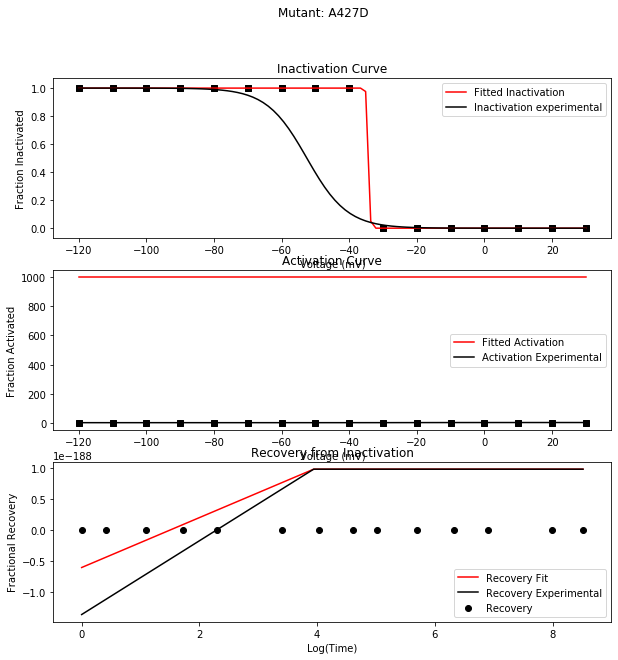

In [11]:

evaluator.plot_data(best_indvs[len(best_indvs) - 1], 'A427D')

/Users/workbench/Applications/nrn/repo/curve_fitting.py:26: RuntimeWarning: overflow encountered in exp
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


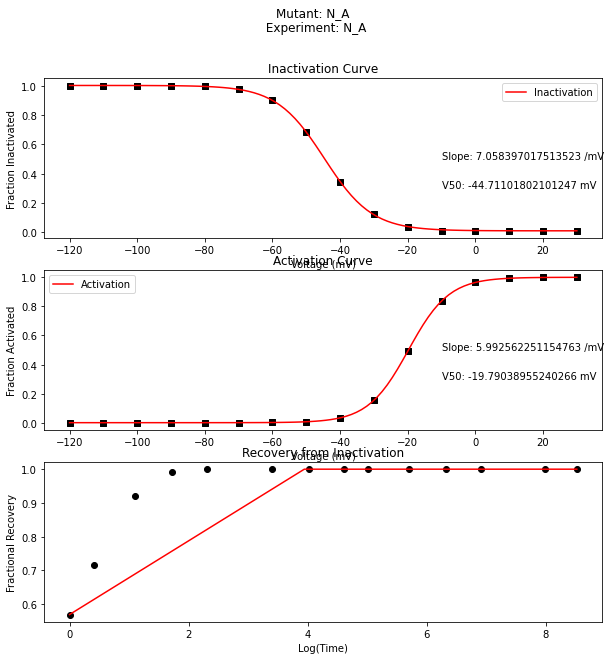

In [4]:

cf.gen_figure_given_params(data)

In [ ]:
 [55, .03, .01, .124, 0.4, 0.0003, .2, .01, .02, 7, 2, 1.5, .5, 7.2, 10, 8, -45, -45, -45, -30, 2, -58, -60, 12]

In [18]:
True == [1]

False

In [2]:
rec_inact_tau_vec, recov_curves, times = ggsd.RFI().genRecInactTau()

In [3]:
times

[1, 1.5, 3, 5.6, 10, 30, 56, 100, 150, 300, 560, 1000, 2930, 5000]

In [4]:
rec_inact_tau_vec

[1226.3287927298059,
 818.2806894319432,
 409.90183231961475,
 220.18463696536037,
 123.83957824418782,
 56.10466113476684,
 57.475199411750935,
 59.803844691785045,
 62.45003251000562,
 70.38859596466735,
 84.14877261941436,
 107.43522541975543,
 209.57807520306972,
 319.1302508774016]

In [5]:
len(rec_inact_tau_vec)

14

In [ ]:
(0.040652537154509075,
 0.26028443658513595,
 0.030042228056468414,
 0.07124836159726516,
 0.8988908960364254,
 0.663347014357213,
 0.22349900601282313,
 0.00692301890216304)